In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = '/content/drive/MyDrive/Prodigy_Internship/heart_failure_clinical_records.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame to inspect the data
print(df.head())



    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

In [5]:
# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

# Check the data types of each column
print(df.dtypes)


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
               age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max  

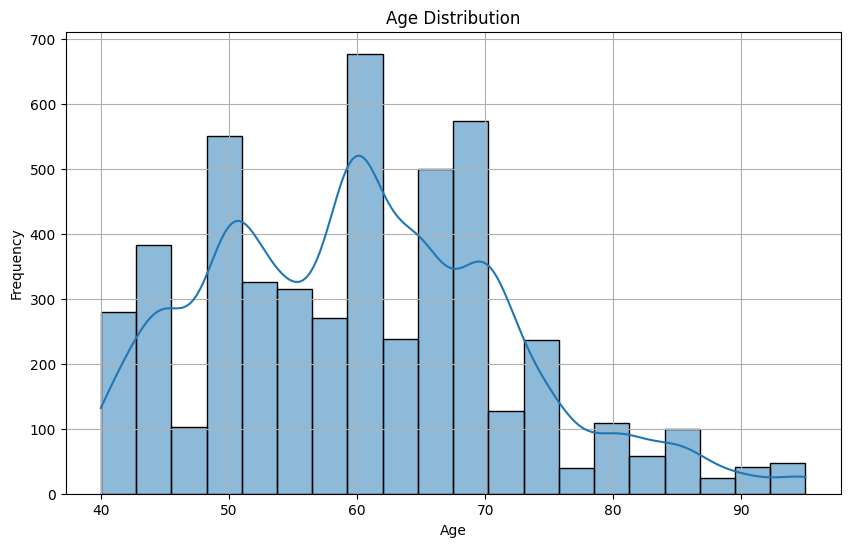

In [6]:
# Plot a histogram to visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-7-fc4fc60077ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df,palette='viridis')


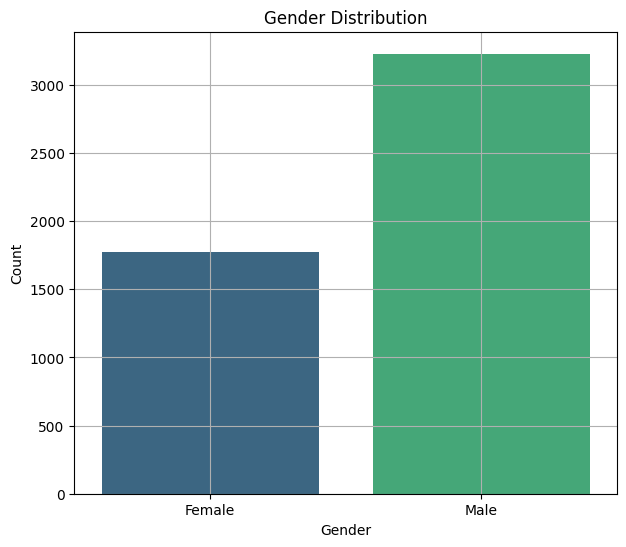

In [ ]:
# Plot a bar chart to visualize the distribution of genders
plt.figure(figsize=(7, 6))
sns.countplot(x='sex', data=df,palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(True)
plt.show()


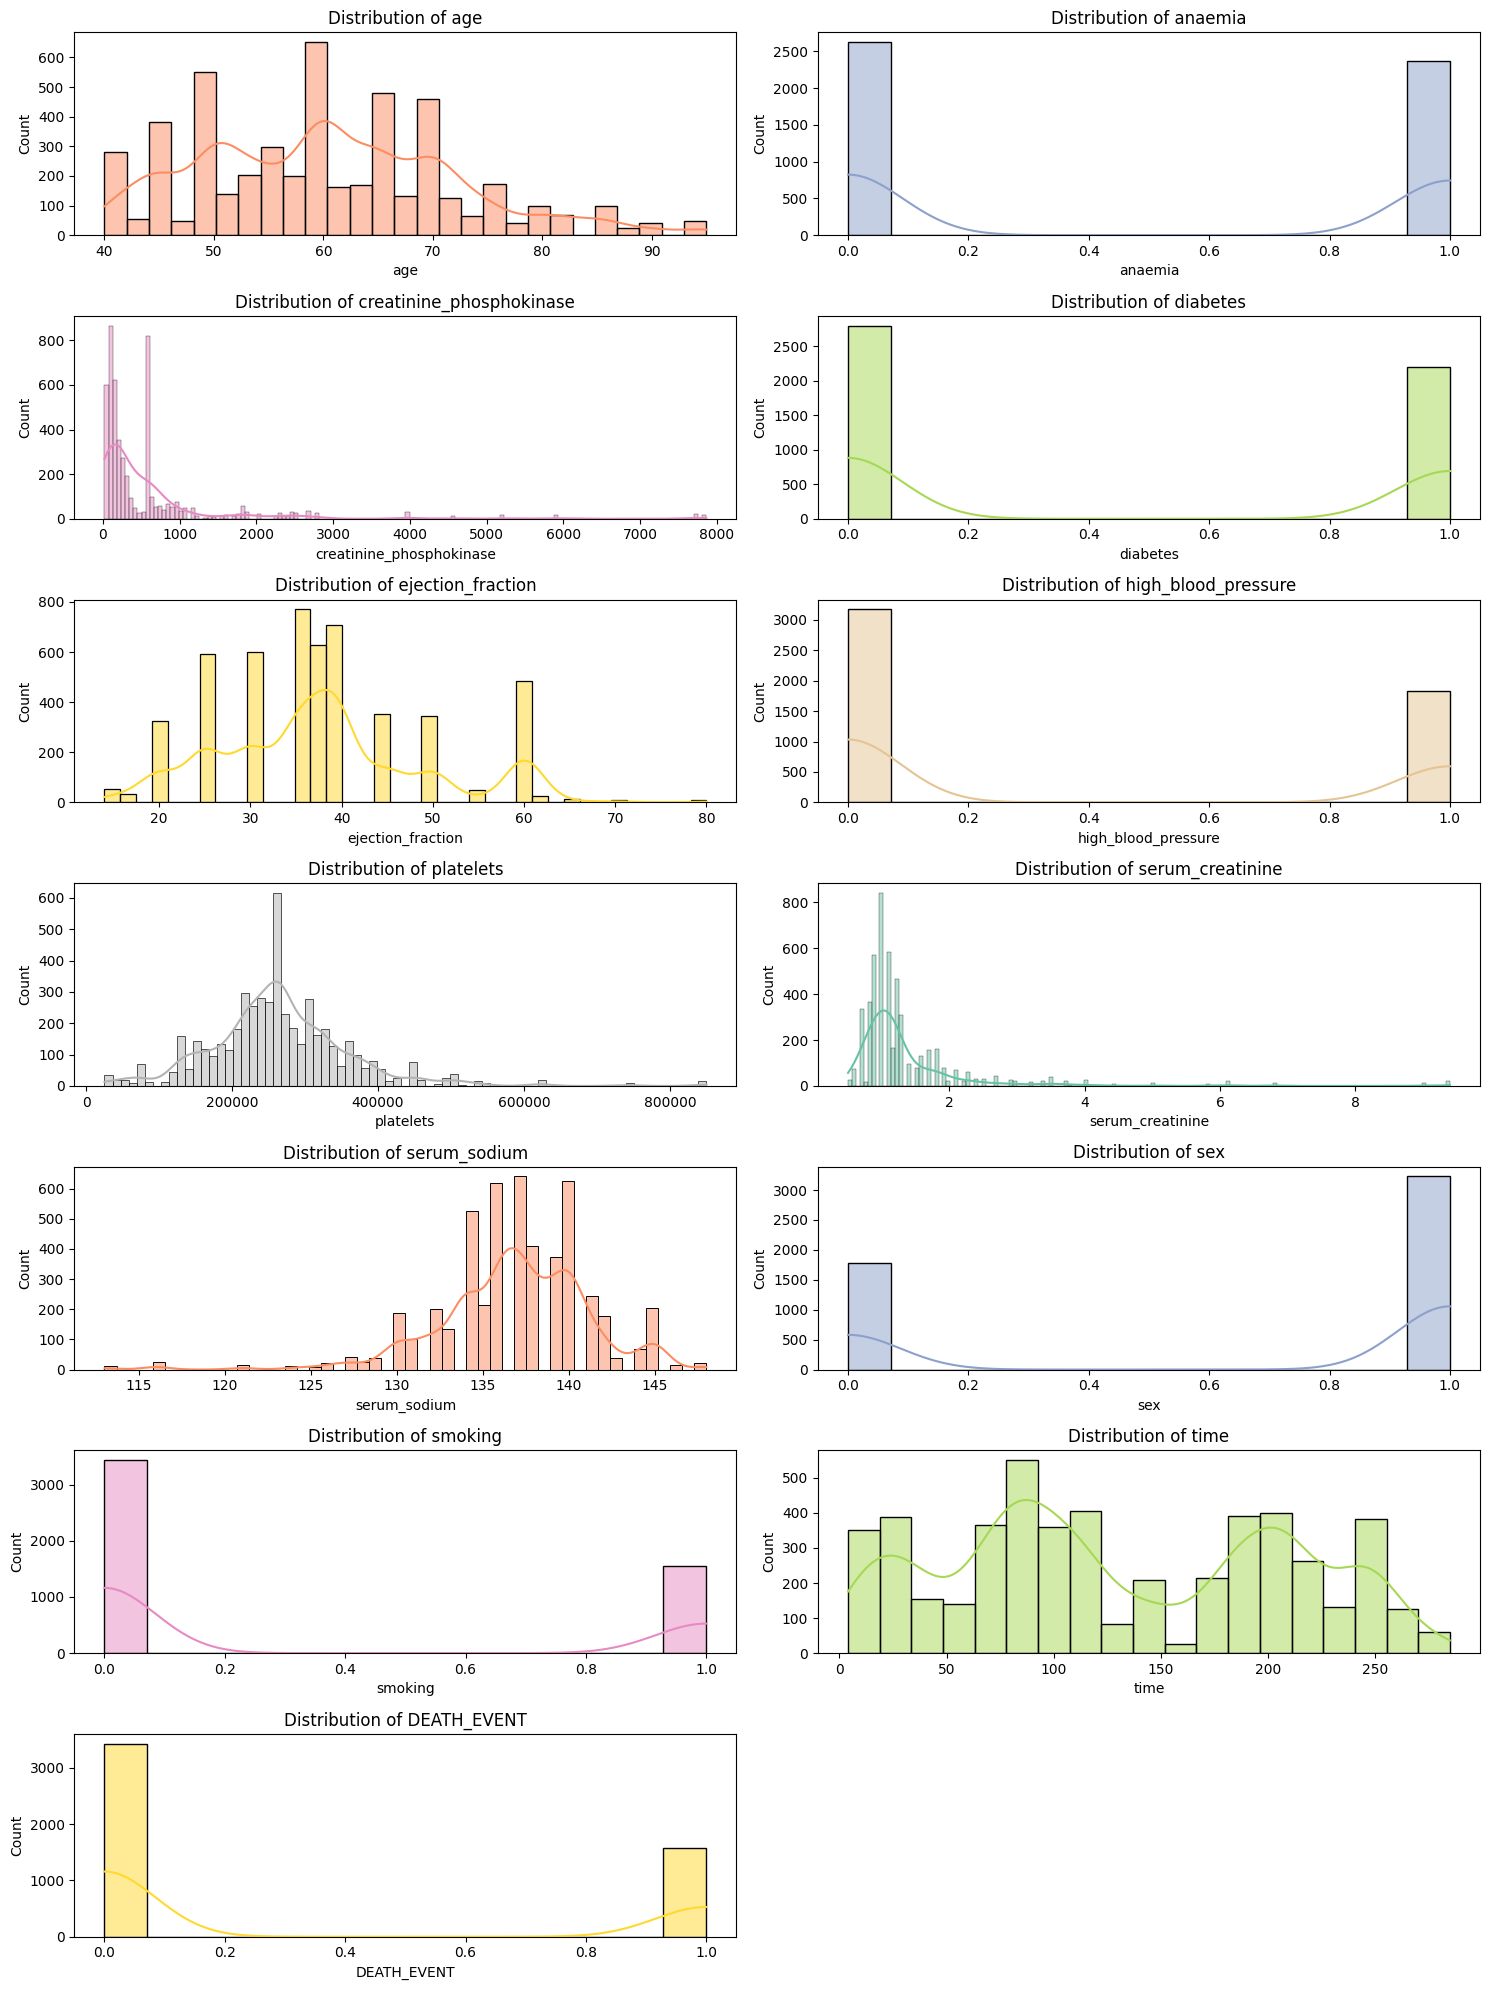

In [ ]:

plt.figure(figsize=(15, 20))
num_plots = len(numerical_cols)
nrows = 4
ncols = 2

# Calculate the required number of rows based on the number of plots
nrows = (num_plots + ncols - 1) // ncols

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set2")[i % 8])
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



<ipython-input-7-65025729b384>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
<ipython-input-7-65025729b384>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
<ipython-input-7-65025729b384>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
<ipython-input-7-65025729b384>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

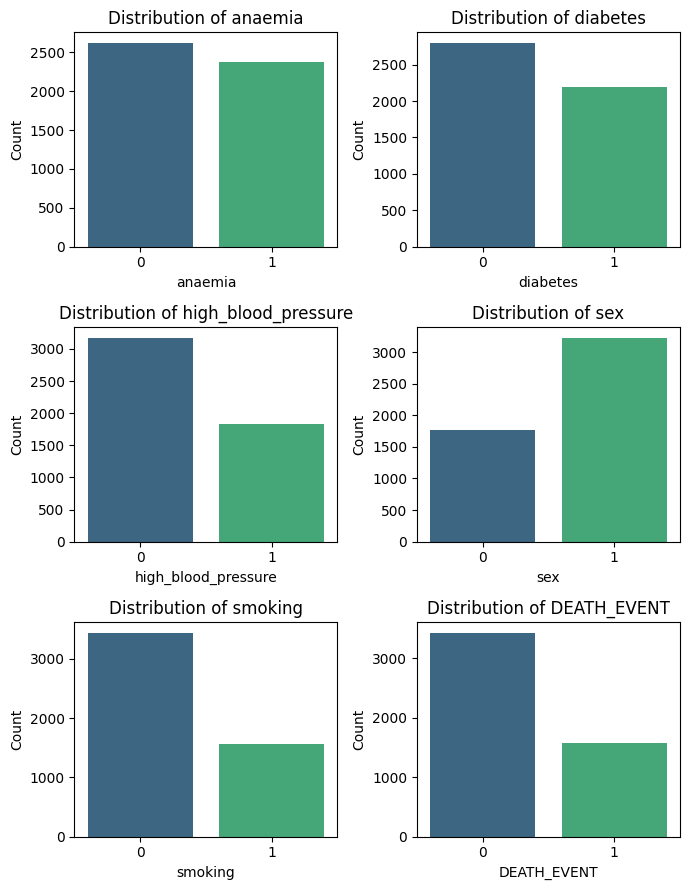

In [7]:
# List of categorical columns to visualize
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Plot distribution of categorical variables
plt.figure(figsize=(7, 9))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


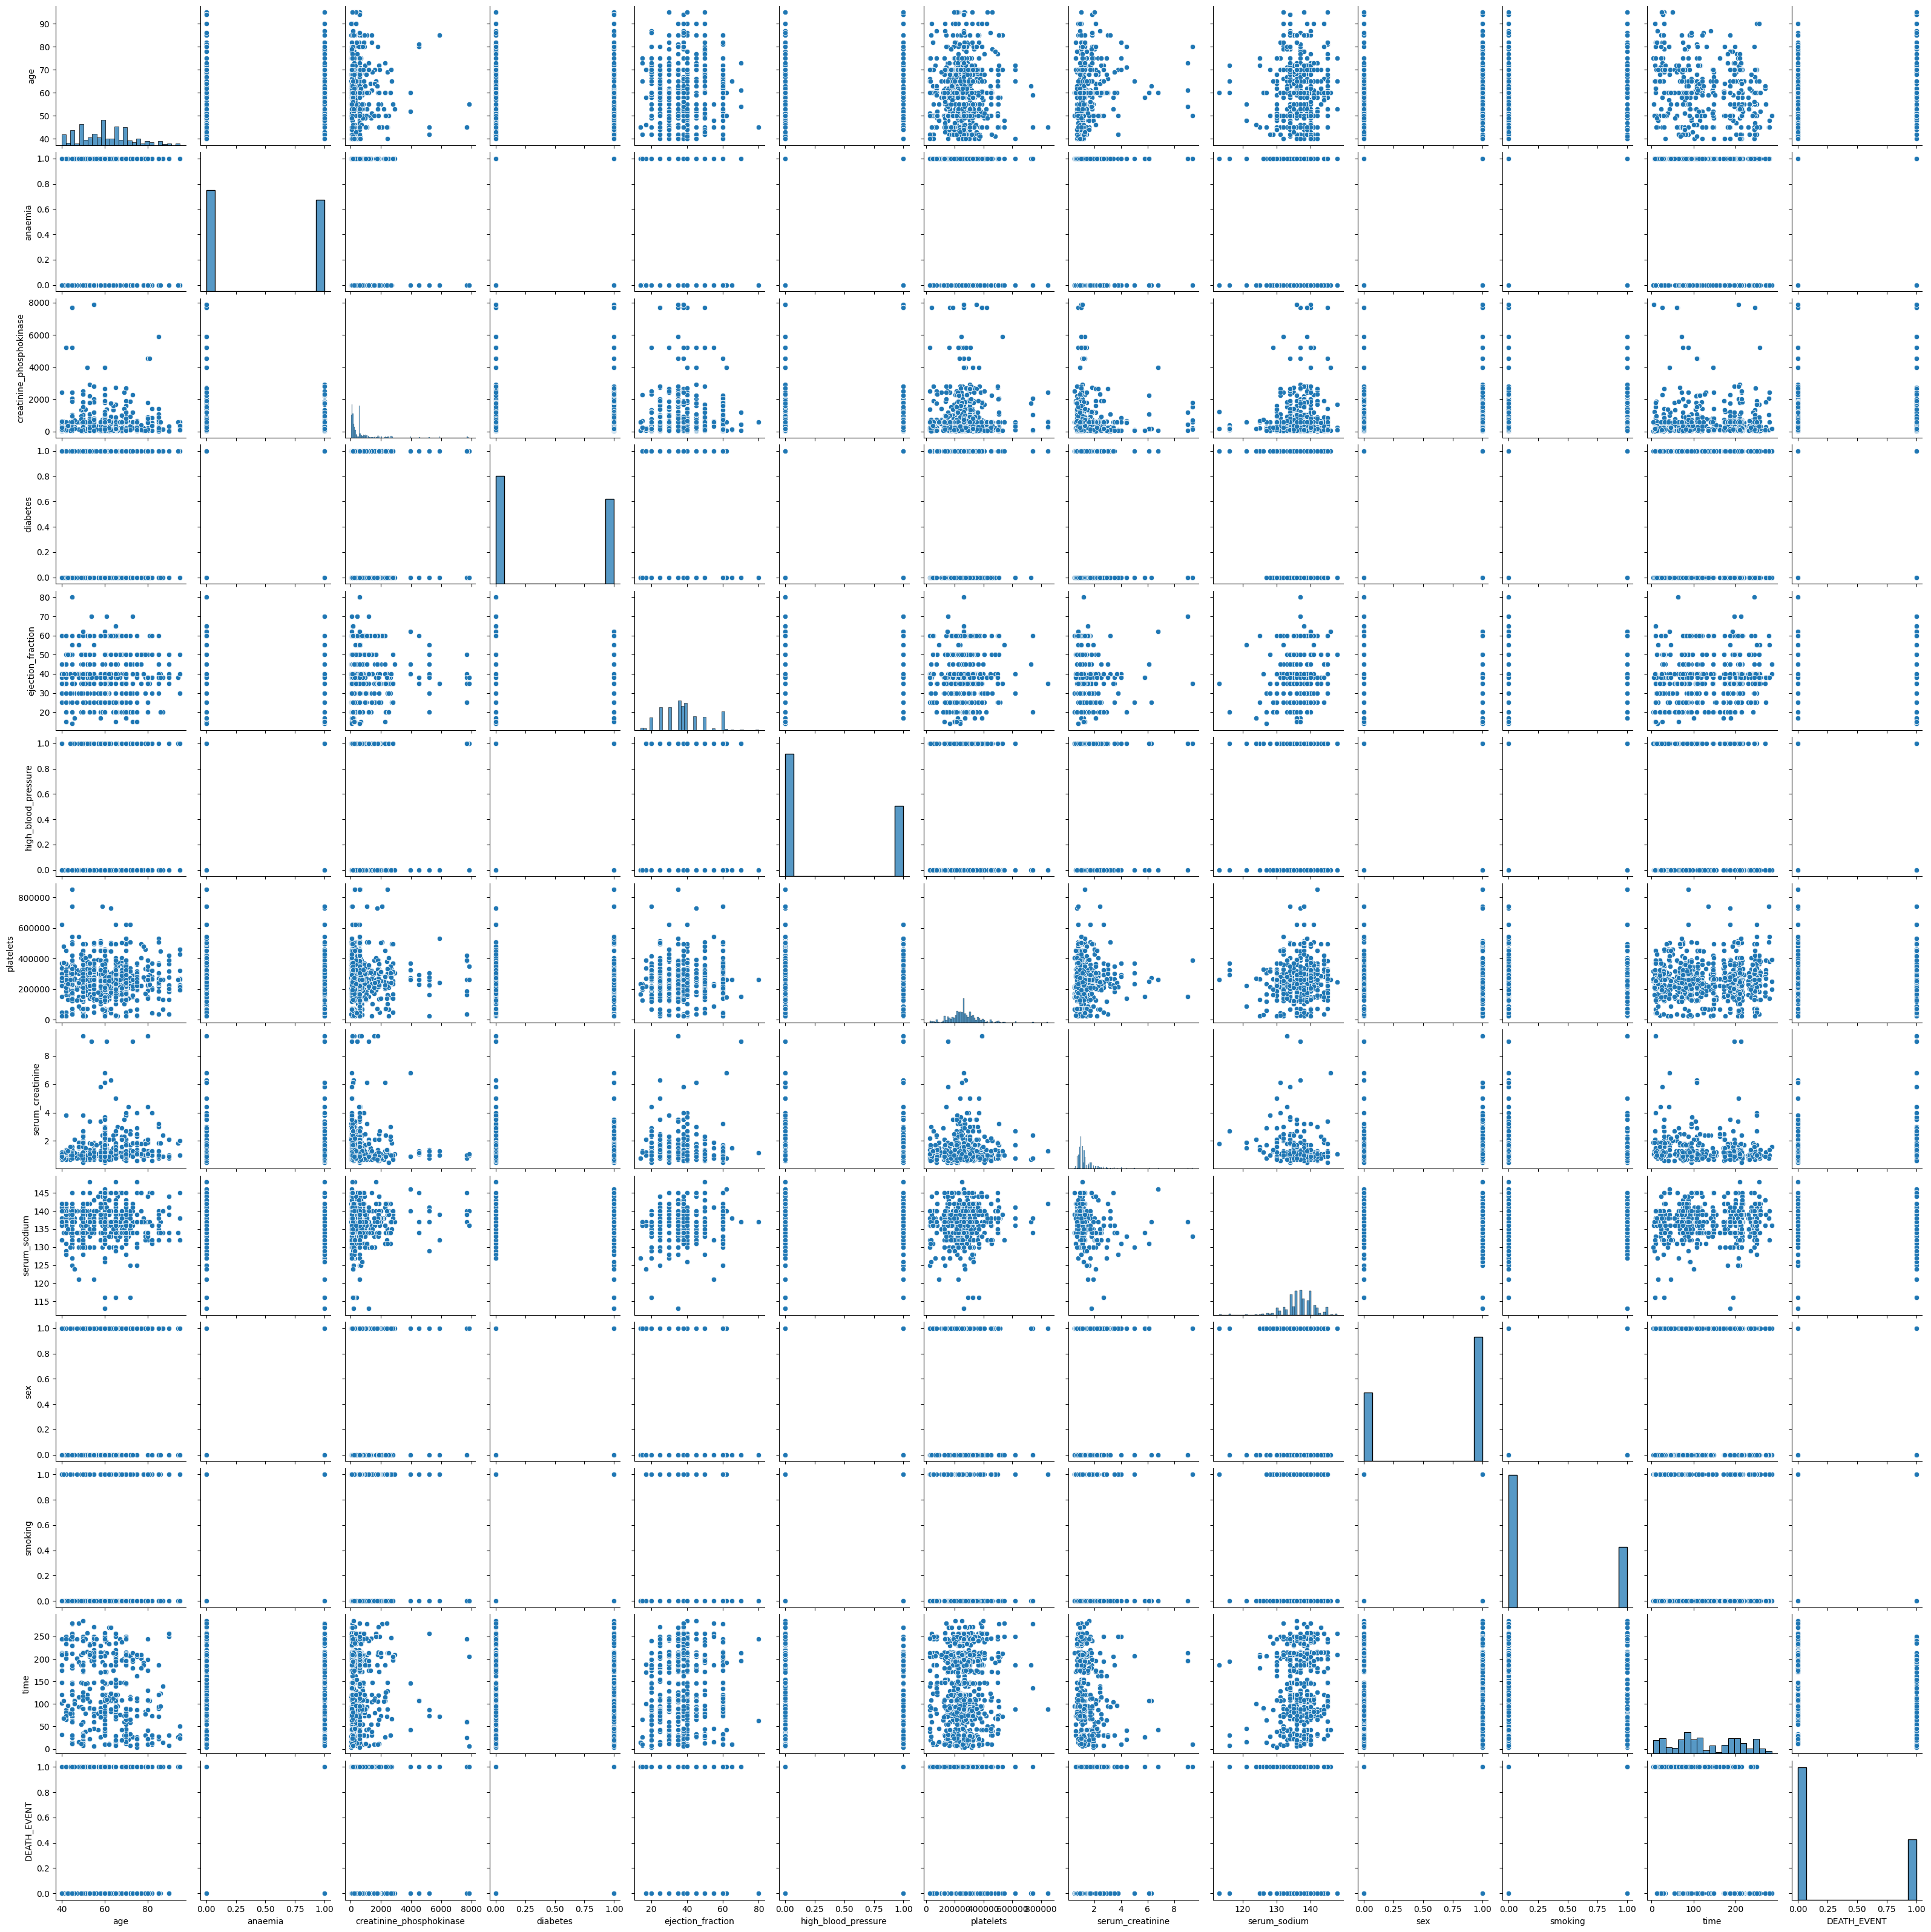

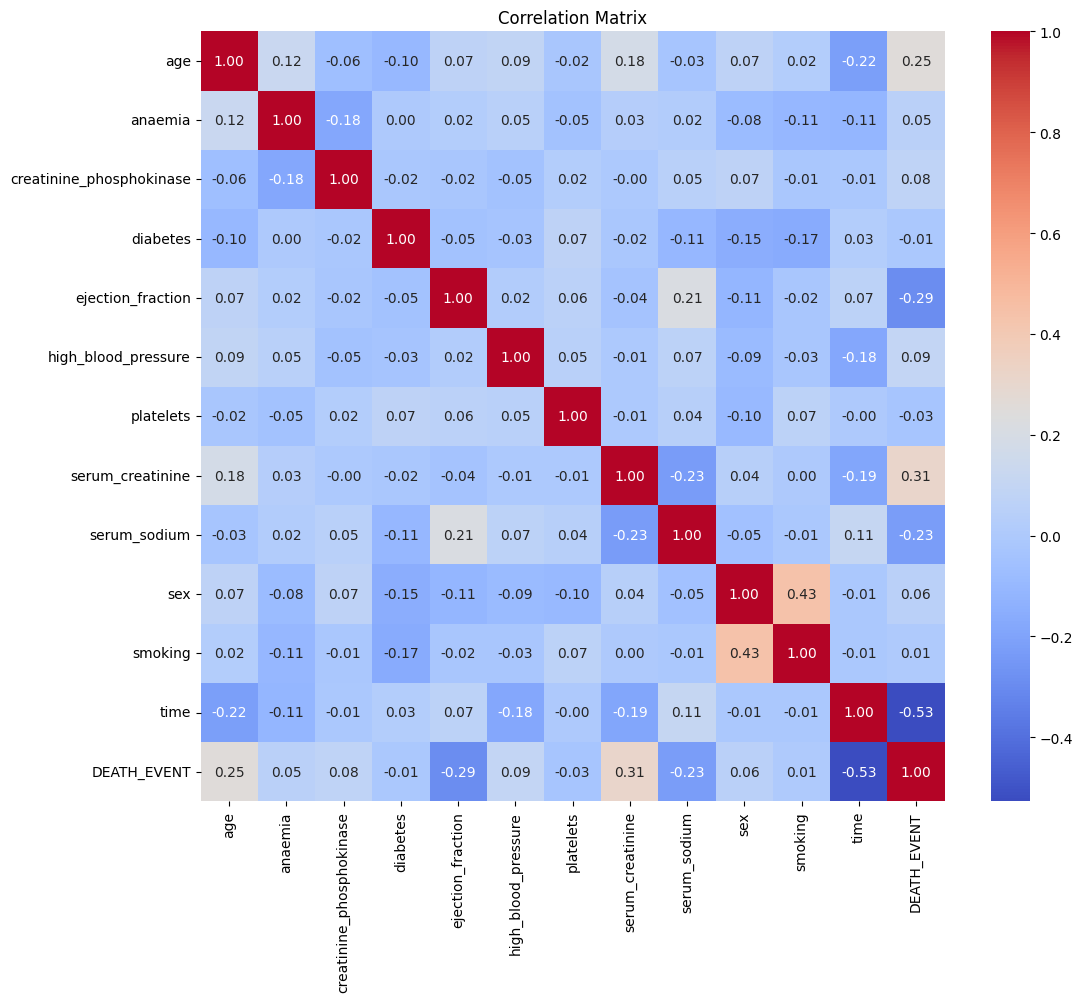

In [ ]:
# Distribution of variables using pairplot
sns.pairplot(df)
plt.show()
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-31-8be7203b7f1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='DEATH_EVENT', data=df, palette=palette)


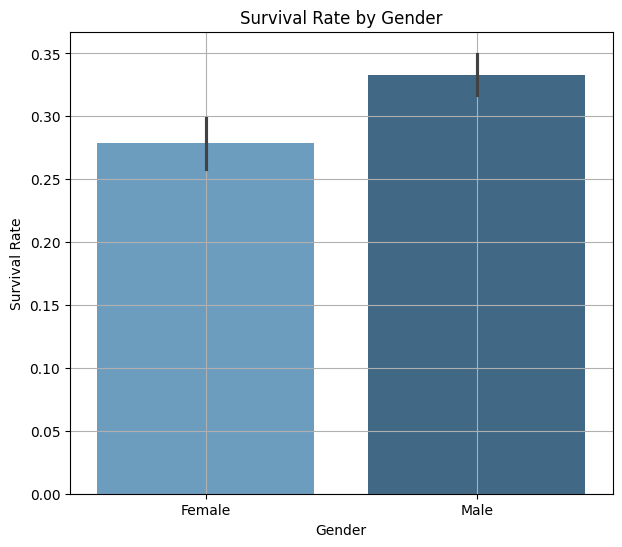

In [ ]:
# Define a custom color palette for the bar plot
palette = sns.color_palette("Blues_d", 2)

# Plot survival rate by gender with custom colors
plt.figure(figsize=(7, 6))
sns.barplot(x='sex', y='DEATH_EVENT', data=df, palette=palette)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(True)
plt.show()


<ipython-input-15-aa26d6f135e5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_bin', y='DEATH_EVENT', data=df, palette=palette)
<ipython-input-15-aa26d6f135e5>:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='age_bin', y='DEATH_EVENT', data=df, palette=palette)


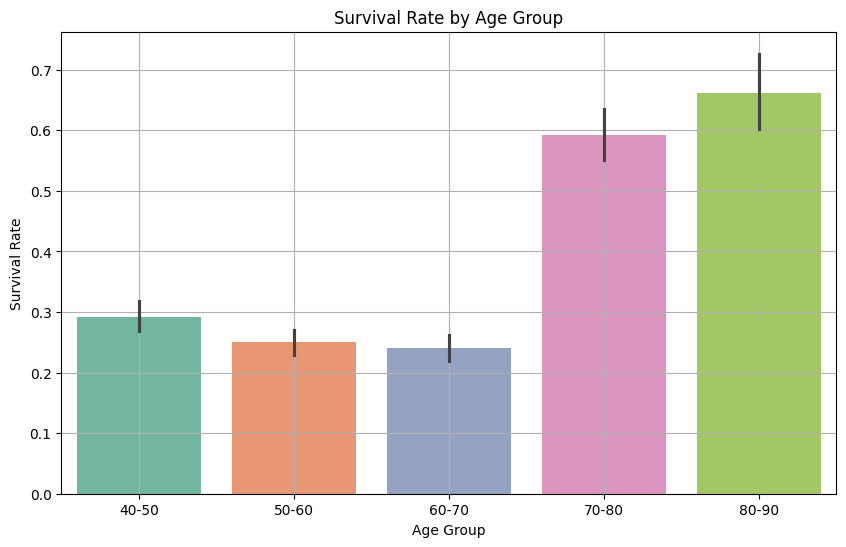

In [ ]:
# Create age bins for better visualization
df['age_bin'] = pd.cut(df['age'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '50-60', '60-70', '70-80', '80-90'])

# Define a custom color palette
palette = sns.color_palette("Set2")

# Plot survival rate by age bin with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='age_bin', y='DEATH_EVENT', data=df, palette=palette)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()


<ipython-input-17-8fadd39620bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='anaemia', y='DEATH_EVENT', data=df, palette='Set2')


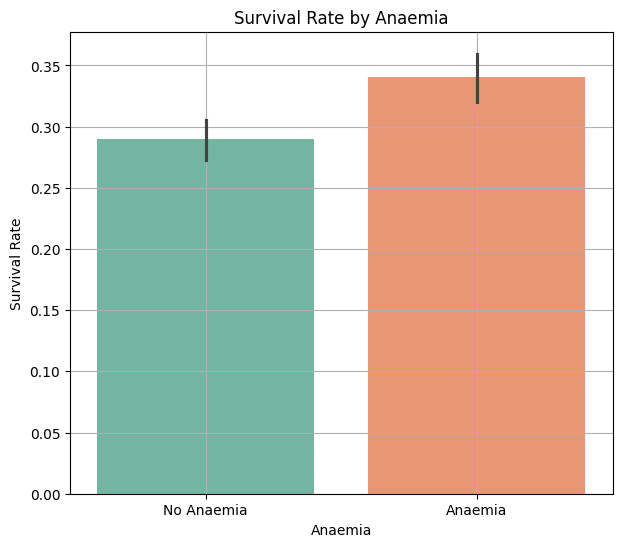

In [ ]:
# Plot survival rate by anaemia
plt.figure(figsize=(7, 6))
sns.barplot(x='anaemia', y='DEATH_EVENT', data=df, palette='Set2')
plt.title('Survival Rate by Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['No Anaemia', 'Anaemia'])
plt.grid(True)
plt.show()


<ipython-input-18-b078e3d6e5cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes', y='DEATH_EVENT', data=df, palette='Set1')


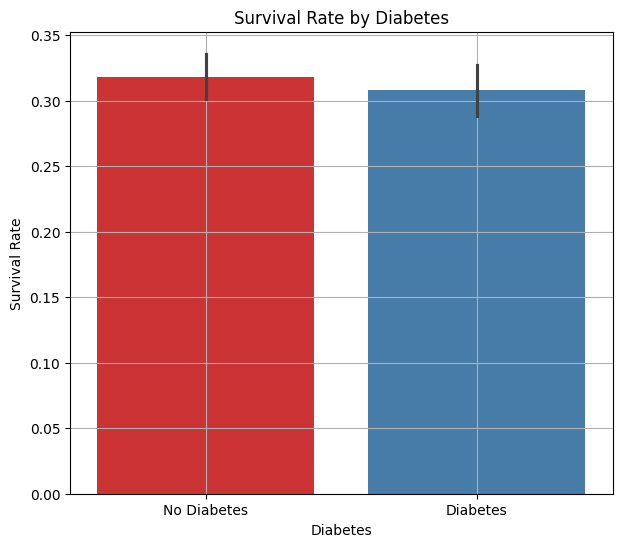

In [ ]:
# Plot survival rate by diabetes
plt.figure(figsize=(7, 6))
sns.barplot(x='diabetes', y='DEATH_EVENT', data=df, palette='Set1')
plt.title('Survival Rate by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()
